## Project 6: Visualizing Monetary Policy

In [1]:
import os 
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

In [2]:
start = datetime.datetime(1948, 1, 1)
end = datetime.datetime.today()
df = web.DataReader('GDPC1', 'fred', start, end).resample('Q').mean()
df

,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot: xlabel='DATE'>

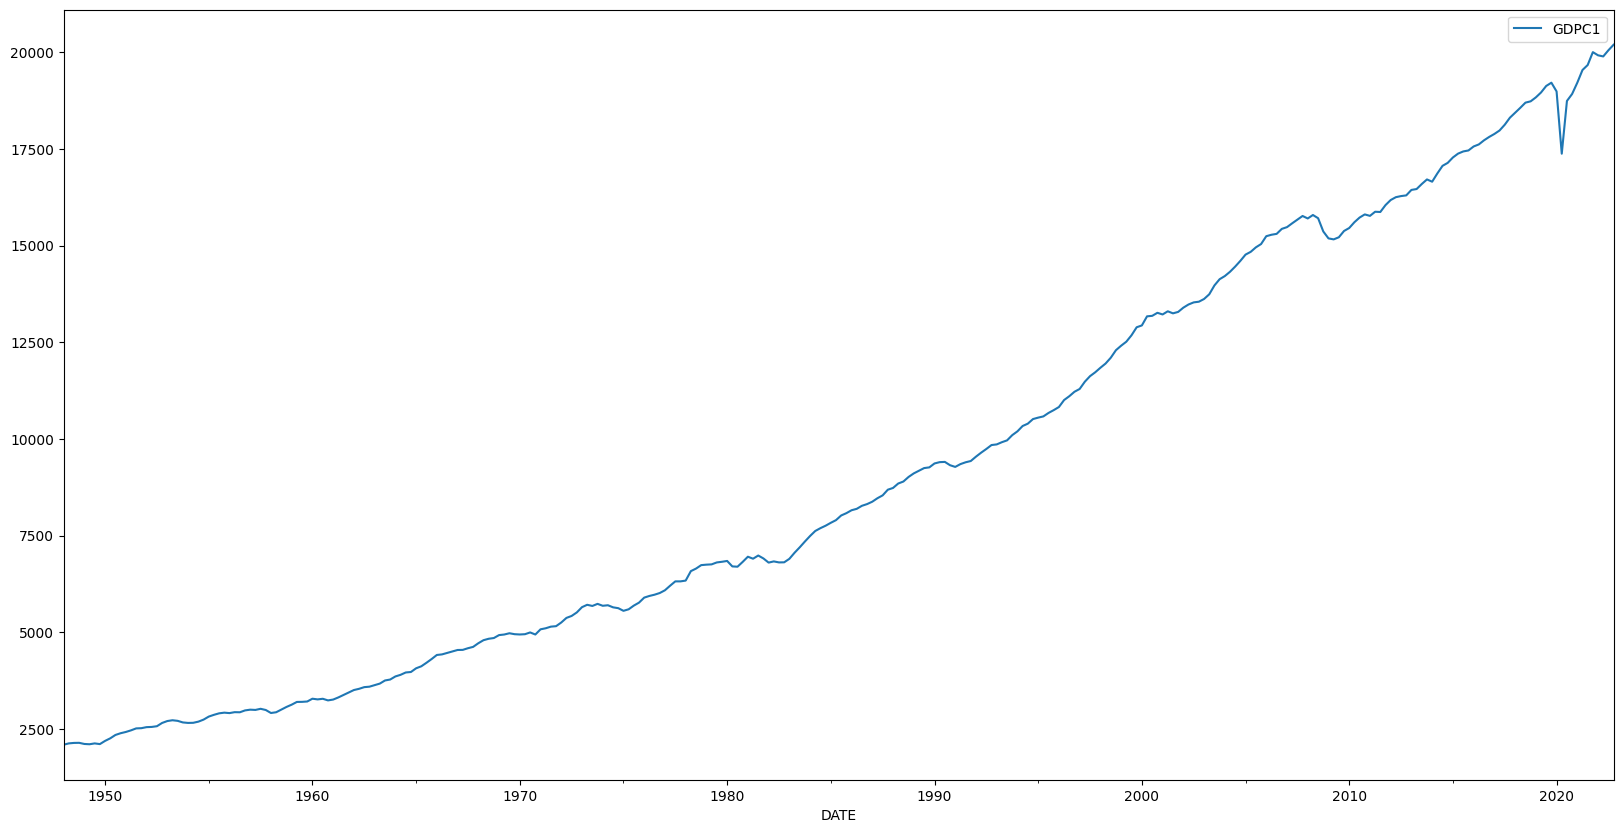

In [3]:
df.plot.line(figsize = (20, 10))

In [4]:
def gather_data(data_code,
                start,
                end = datetime.datetime.today(),
                freq = 'M'):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, 'fred', start, end).resample(freq).mean() # first() or last() or median
            df.rename(columns= {code:key}, inplace= True)
            df_init = True
        else:
            df[key] = web.DataReader(code, 'fred', start, end).resample(freq).mean()
    return df

In [5]:
data_codes = {'Base: Total' : 'BOGMBASEW',
                'Base: Currency in Circulation' : 'WCURCIR'}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_code = data_codes,
                    start = start,
                    end = end,
                    freq = 'W')

data['Base: Currency in Circulation'] = data['Base: Currency in Circulation'].mul(1000)

In [6]:
data.iloc[-12:]

,Base: Total,Base: Currency in Circulation
DATE,,
2020-06-28,4866046.0,1961158.0
2020-07-05,4866046.0,1967076.0
2020-07-12,4772522.0,1974690.0
2020-07-19,4772522.0,1978510.0
2020-07-26,4609143.0,1982873.0
2020-08-02,4609143.0,1988190.0
2020-08-09,4750981.0,1996626.0
2020-08-16,4750981.0,2003019.0
2020-08-23,4830999.0,2007458.0


<AxesSubplot: xlabel='DATE'>

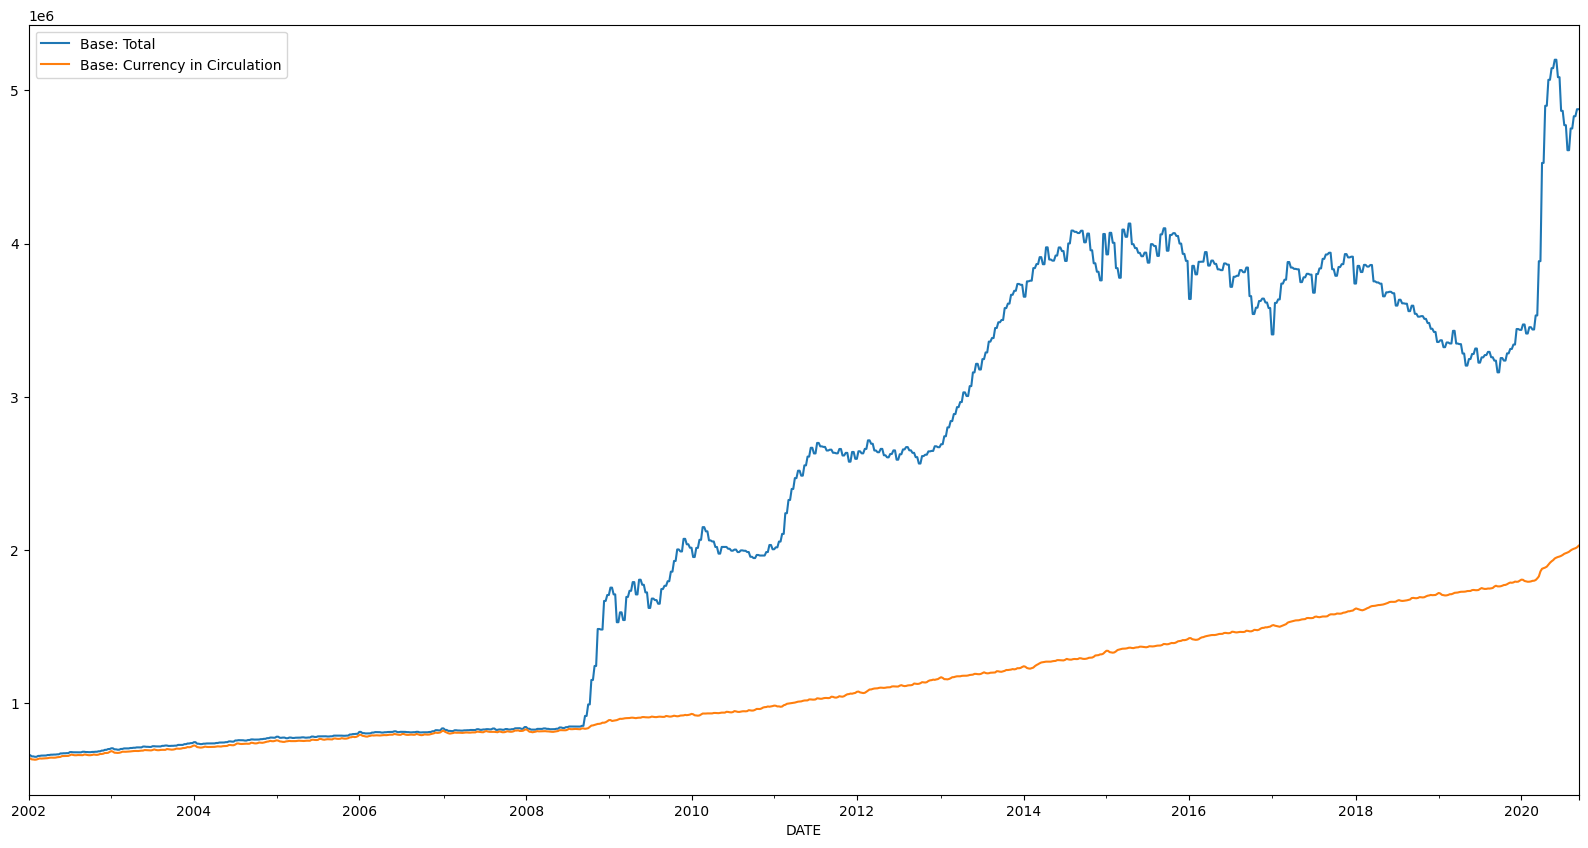

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))
data.plot.line(ax = ax)

<AxesSubplot: xlabel='DATE'>

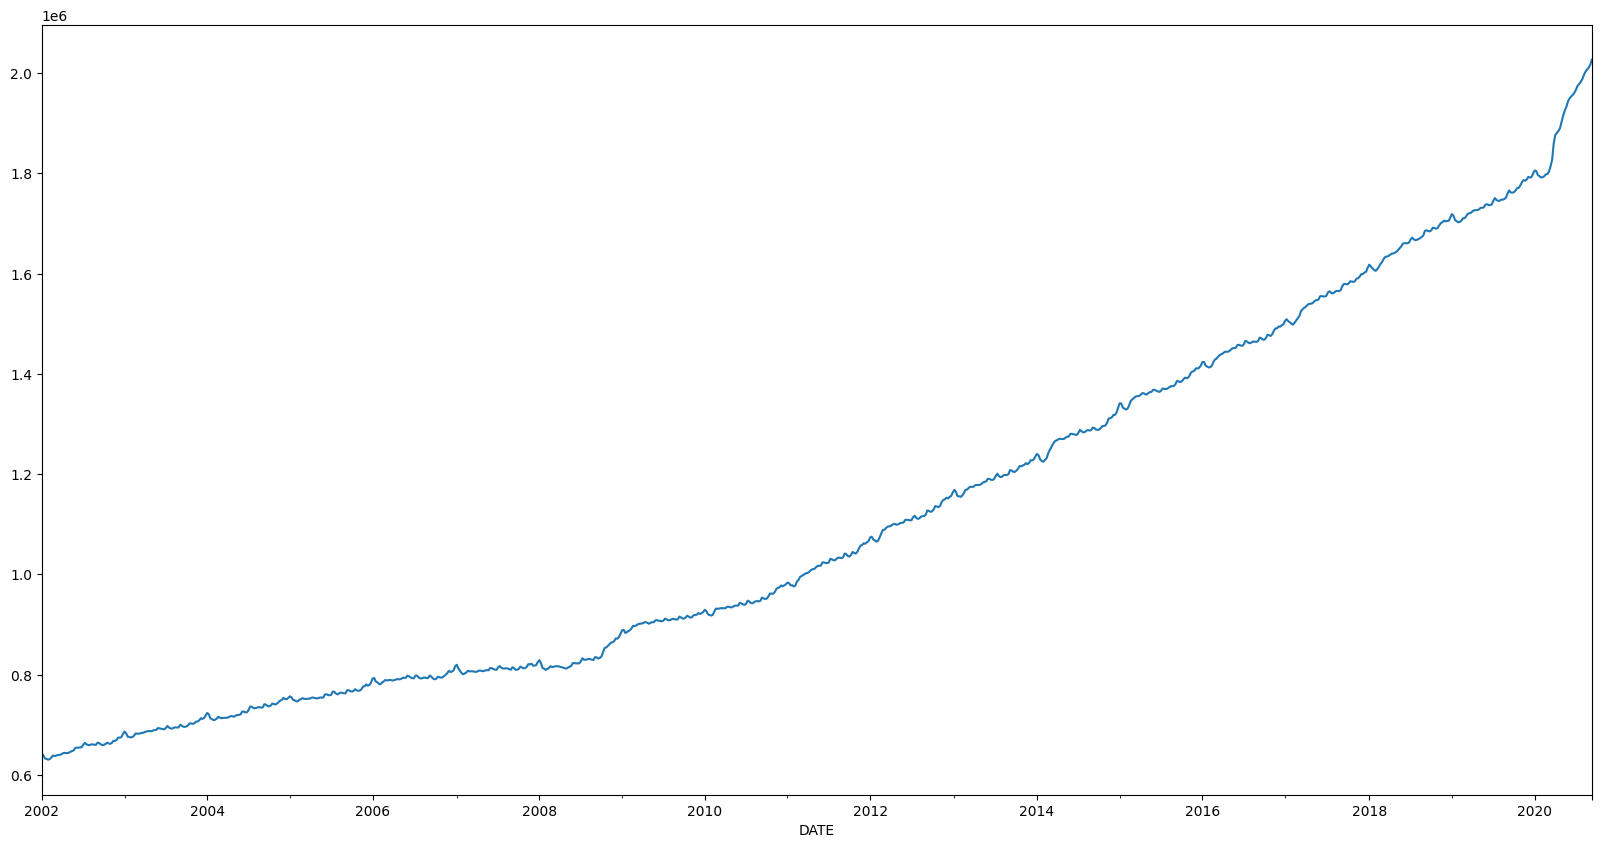

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))
data['Base: Currency in Circulation'].plot.line(ax = ax)

In [9]:
data_codes  = {'Base: Total ($ Mil)': 'BOGMBASE',
               'Base: Currency in Circulation ($ Mil)': 'WCURCIR',
               # Assets
               'Balance Sheet: Total Assets ($ Mil)': 'WALCL',
               'Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)': 'WSRLL',
               'Balance Sheet: Securities Held Outright ($ Mil)': 'WSHOSHO',
               ### breakdown of securities holdings ###
               'Balance Sheet: U.S. Treasuries Held Outright ($ Mil)':'WSHOTSL',
               'Balance Sheet: Federal Agency Debt Securities ($ Mil)' : 'WSHOFADSL',
               'Balance Sheet: Mortgage-Backed Securities ($ Mil)': 'WSHOMCB',
               # other forms of lending
               'Balance Sheet: Repos ($ Mil)': 'WORAL',
               'Balance Sheet: Central Bank Liquidity Swaps ($ Mil)' : 'SWPT',
               'Balance Sheet: Direct Lending ($ Mil)' : 'WLCFLL',
               # unamortized value of securities held (due to changes in interest rates)
               'Balance Sheet: Unamortized Security Premiums ($ Mil)': 'WUPSHO',
               # Liabilities
               'Balance Sheet: Total Liabilities ($ Mil)' : 'WLTLECL',
               'Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)' : 'WLFN',
               'Balance Sheet: Reverse Repos ($ Mil)': 'WLRRAL',
               ### Major share of deposits 
               'Balance Sheet: Excess Reserves ($ Mil)': 'EXCSRESNW',
               'Balance Sheet: Required Reserves ($ Mil)': 'RESBALREQW',
               'Balance Sheet: Total Reserves ($ Mil)': 'WRESBAL',
               'Balance Sheet: Deposits from Dep. Institutions ($ Mil)':'WLODLL',
               'Balance Sheet: U.S. Treasury General Account ($ Mil)': 'WDTGAL',
               'Balance Sheet: Other Deposits ($ Mil)': 'WOTHLB',
               'Balance Sheet: All Deposits ($ Mil)': 'WLDLCL',
               # Interest Rates
               'Federal Funds Target (Pre-Crisis)': 'DFEDTAR',
               'Federal Funds (Upper) Target':'DFEDTARU',
               'Effective Federal Funds Rate':'DFF',
               'Interest on Excess Reserves':'IOER',
               'Interest on Reserve Balances':'IORB',

               # Req Reserves and Vault Cash
               'Vault Cash ($ Mil)': 'TLVAULTW',
               'Vault Cash Used as Req. ($ Mil)': 'VAULT',
               }

data = gather_data(data_code = data_codes,
                    start = start,
                    end = end,
                    freq = 'W')


<AxesSubplot: xlabel='DATE'>

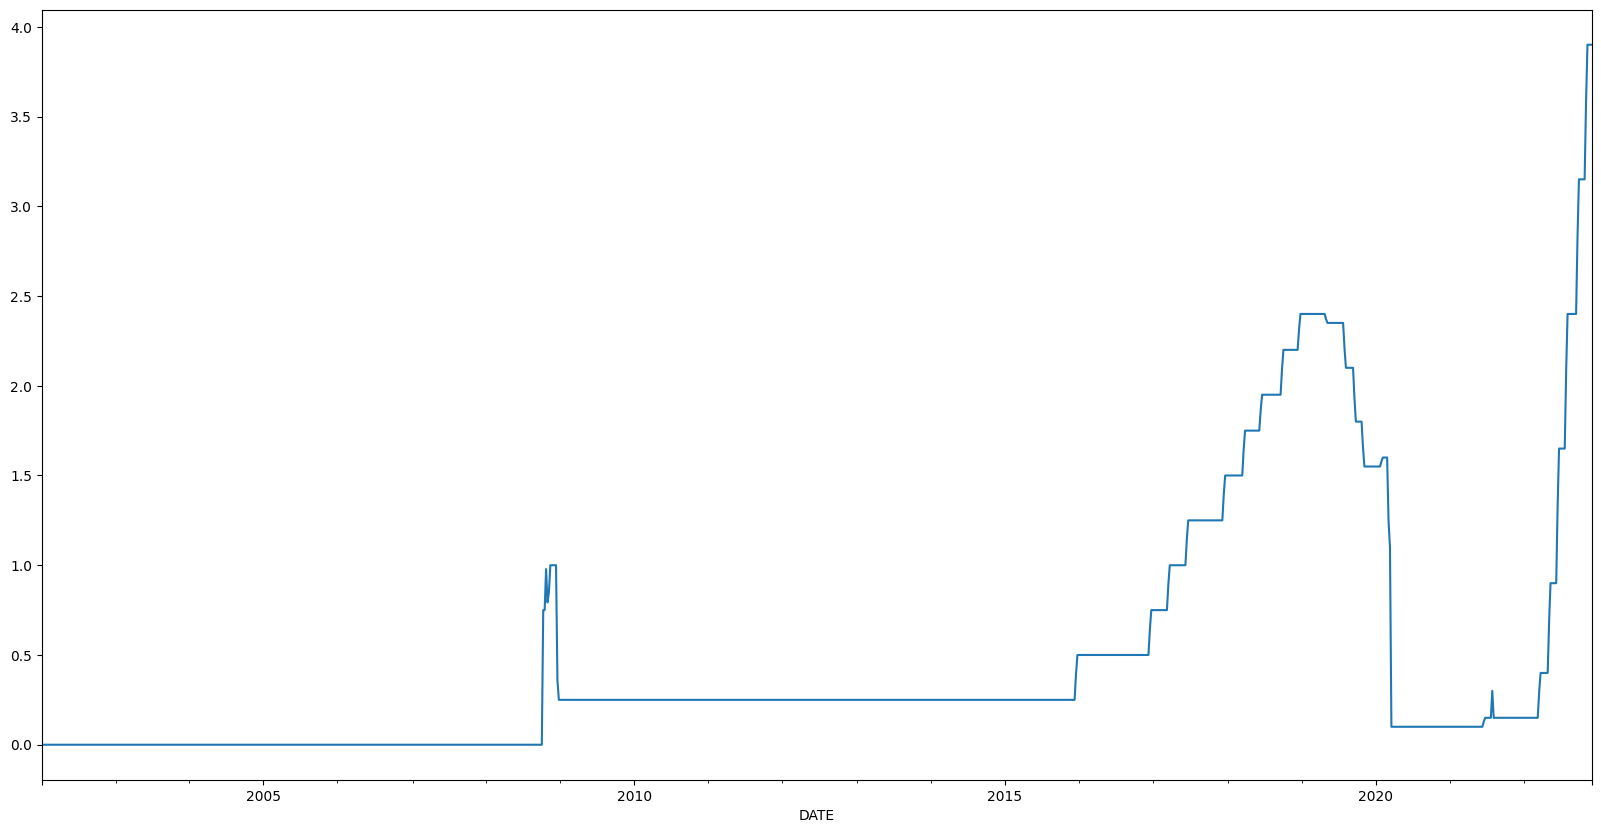

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_data = data[['Interest on Reserve Balances', 'Interest on Excess Reserves']]
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)   
plot_data.plot.line(ax = ax) 

In [11]:
plot_data = data[['Interest on Reserve Balances', 'Interest on Excess Reserves']]
match = plot_data[plot_data['Interest on Reserve Balances'] == plot_data['Interest on Excess Reserves']]
match_date = match.index
match_val = match.sum(axis = 1) / 2
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis=1)
plot_data.loc[match_date] = match_val
print(match_date, match_val)

DatetimeIndex(['2021-08-01'], dtype='datetime64[ns]', name='DATE', freq='W-SUN') DATE
2021-08-01    0.15
Freq: W-SUN, dtype: float64


<AxesSubplot: xlabel='DATE'>

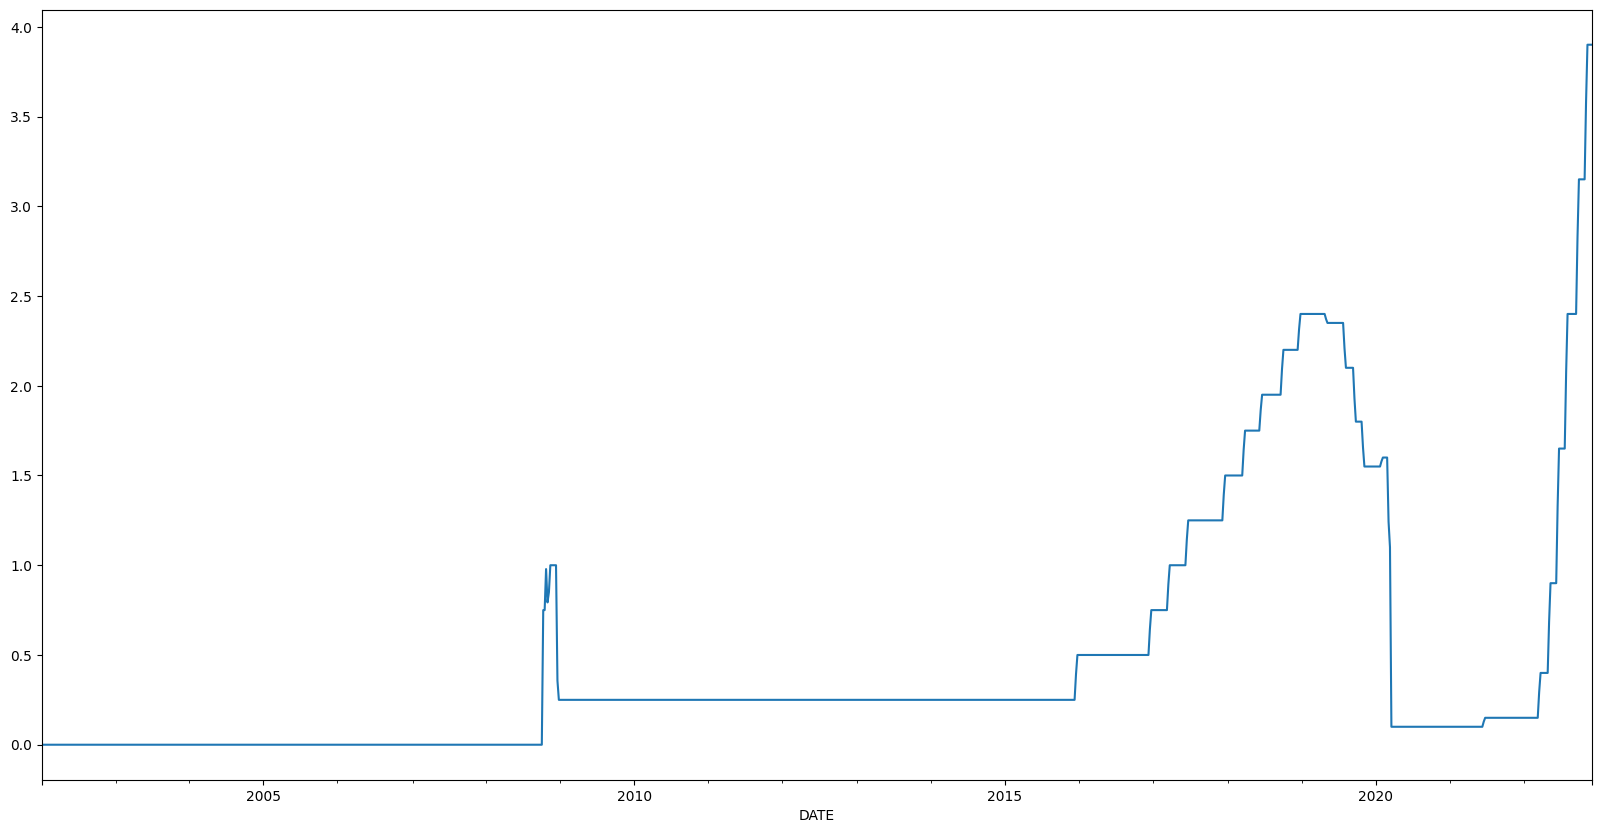

In [12]:
fig, ax = plt.subplots(figsize = (20, 10))
plot_data.plot.line(ax = ax)